# MCCI: Demo of the selector and explainability

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from typing import List, Tuple
import seaborn as sns

from mcci_selector import MCCISelector
from mcci_explainability import MCCIExplainability

# To display more rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
# Load and preprocess the data
data = load_digits()
X, y = data.data, data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Feature Importance:
       Feature  Importance
54  Feature 54        1.00
26  Feature 26        1.00
28  Feature 28        1.00
30  Feature 30        1.00
33  Feature 33        1.00
21  Feature 21        1.00
20  Feature 20        1.00
19  Feature 19        1.00
34  Feature 34        1.00
35  Feature 35        1.00
60  Feature 60        1.00
61  Feature 61        1.00
36  Feature 36        1.00
13  Feature 13        1.00
37  Feature 37        1.00
38  Feature 38        1.00
10  Feature 10        1.00
42  Feature 42        1.00
43  Feature 43        1.00
53  Feature 53        1.00
3    Feature 3        1.00
2    Feature 2        1.00
25  Feature 25        1.00
44  Feature 44        0.99
46  Feature 46        0.99
50  Feature 50        0.99
27  Feature 27        0.99
22  Feature 22        0.99
62  Feature 62        0.99
9    Feature 9        0.99
5    Feature 5        0.99
58  Feature 58        0.99
29  Feature 29        0.98
18  Feature 18        0.98
59  Feature 59        0.97
51  Feat

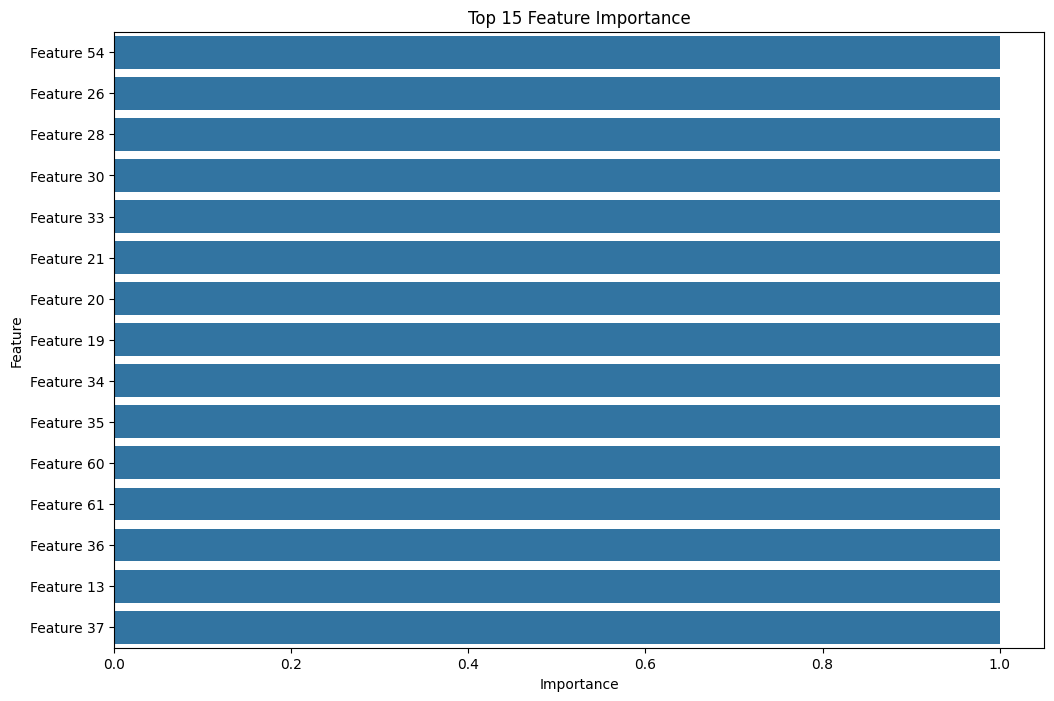

In [4]:
# Initialize and fit the MCCISelector
n_features_to_select = 10
selector = MCCISelector(alpha=0.2, num_samples=100, random_state=RANDOM_SEED)
X_selected = selector.fit_transform(X_scaled, y, n_features_to_select)

# Initialize MCCIExplainability
explainer = MCCIExplainability(selector)

# Get feature importance
importance_df = explainer.get_feature_importance()
print("Feature Importance:")
print(importance_df)

# Plot feature importance
explainer.plot_feature_importance(top_n=15)

In [5]:
# Get selected features
selected_features = explainer.get_selected_features(n_features_to_select)
print("Selected Features:", selected_features)

Selected Features: ['Feature 43', 'Feature 28', 'Feature 33', 'Feature 34', 'Feature 35', 'Feature 36', 'Feature 37', 'Feature 3', 'Feature 30', 'Feature 38']


In [7]:
# Get threshold
threshold = explainer.get_threshold()
print("Calibrated Threshold:", threshold)

Calibrated Threshold: 0.030908551


Feature Stability:
       Feature  Stability
28  Feature 28     1.0000
10  Feature 10     1.0000
21  Feature 21     1.0000
61  Feature 61     1.0000
26  Feature 26     1.0000
30  Feature 30     1.0000
33  Feature 33     1.0000
34  Feature 34     1.0000
36  Feature 36     1.0000
38  Feature 38     1.0000
42  Feature 42     1.0000
43  Feature 43     1.0000
2    Feature 2     1.0000
20  Feature 20     1.0000
35  Feature 35     0.9990
60  Feature 60     0.9990
53  Feature 53     0.9980
19  Feature 19     0.9975
46  Feature 46     0.9970
13  Feature 13     0.9955
54  Feature 54     0.9945
5    Feature 5     0.9940
58  Feature 58     0.9940
25  Feature 25     0.9930
37  Feature 37     0.9915
50  Feature 50     0.9910
29  Feature 29     0.9900
27  Feature 27     0.9900
44  Feature 44     0.9885
9    Feature 9     0.9870
62  Feature 62     0.9820
22  Feature 22     0.9815
59  Feature 59     0.9800
18  Feature 18     0.9790
3    Feature 3     0.9710
51  Feature 51     0.9705
41  Feature 41     

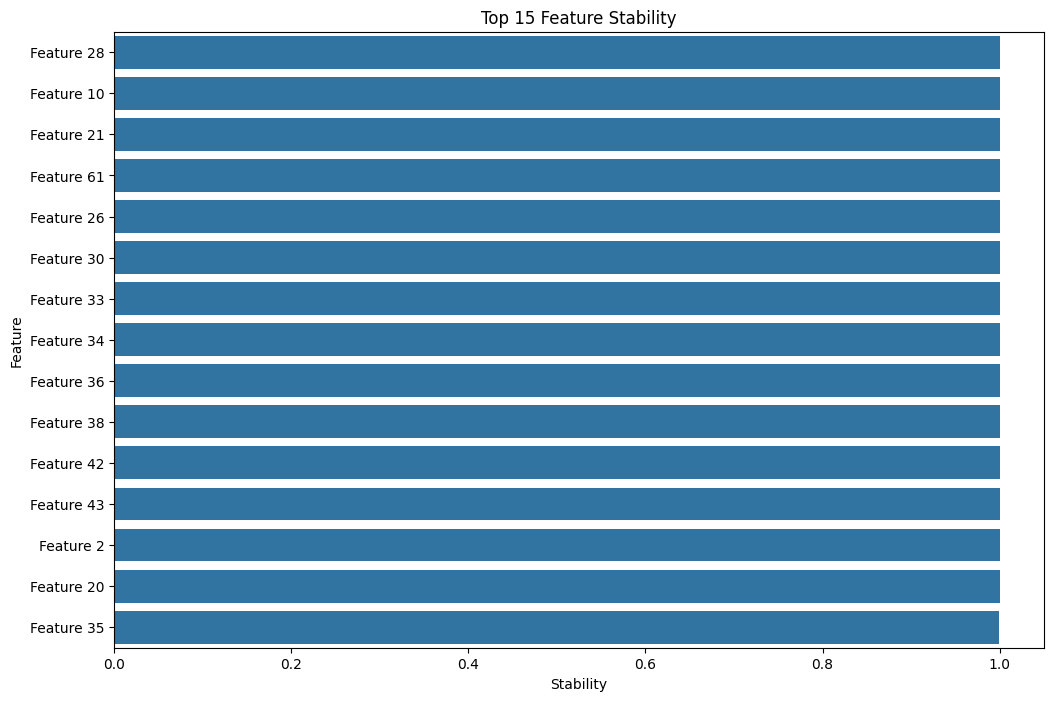

In [8]:
# Calculate feature stability
stability_df = explainer.get_feature_stability(X_scaled, y, n_iterations=20, subsample_ratio=0.8)
print("Feature Stability:")
print(stability_df)

# Plot feature stability
explainer.plot_feature_stability(stability_df, top_n=15)

Local Feature Importance:
       Feature  Local_Importance
21  Feature 21          0.999970
34  Feature 34          0.999957
33  Feature 33          0.999912
30  Feature 30          0.999877
61  Feature 61          0.999873
26  Feature 26          0.999867
54  Feature 54          0.999788
28  Feature 28          0.999782
42  Feature 42          0.999768
43  Feature 43          0.999644
36  Feature 36          0.999527
38  Feature 38          0.999519
20  Feature 20          0.999208
13  Feature 13          0.999189
58  Feature 58          0.999149
2    Feature 2          0.999034
53  Feature 53          0.998484
62  Feature 62          0.996705
10  Feature 10          0.996359
37  Feature 37          0.995762
44  Feature 44          0.995547
46  Feature 46          0.995233
60  Feature 60          0.994399
50  Feature 50          0.993734
29  Feature 29          0.993510
25  Feature 25          0.993229
35  Feature 35          0.991883
41  Feature 41          0.991001
18  Feature 18   

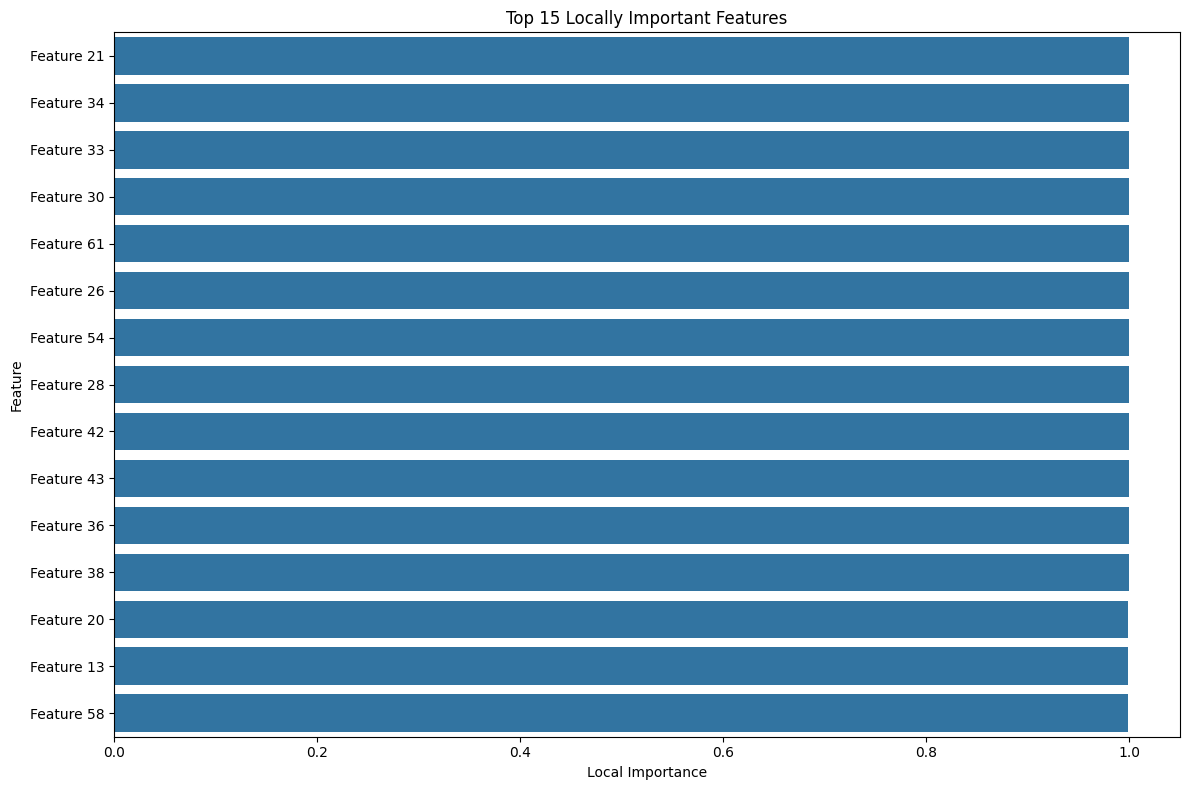

In [9]:
# Local feature importance
# Select an instance for local interpretation
instance_index = 0
X_instance = X_scaled[instance_index]

# Compute local feature importance
local_importance = explainer.local_feature_importance(X_instance)
print("Local Feature Importance:")
print(local_importance)

# Plot local feature importance
explainer.plot_local_feature_importance(local_importance, top_n=15)